<a href="https://colab.research.google.com/github/kallurimeghana/Mini-Project/blob/main/ImageClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread 
from skimage.transform import resize 

In [2]:
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES=['apple','banana']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']}, {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [6]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [9]:
confusion_matrix(y_pred,y_test)

array([[7, 1],
       [0, 7]])

In [10]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [11]:
model=pickle.load(open('img_model.p','rb'))

Enter you URLhttps://i.ytimg.com/vi/fmCTR8fsl80/maxresdefault.jpg
(720, 1280, 3)
 PREDICTED OUTPUT:banana


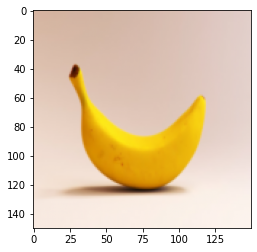

In [13]:
flat_data=[]
url=input("Enter you URL")
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT:{y_out}')
